<a href="https://colab.research.google.com/github/Dimple626/21Projects-ML-DL-GenAI-/blob/main/Project08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THEORY: CIFAR-100 Image Classification Assignment
Objective:
Apply deep learning models (ANN & CNN) to the CIFAR-100 dataset and analyze performance.

About CIFAR-100
Consists of 60,000 color images (32x32 pixels, 3 channels) across 100 classes.

50,000 training images, 10,000 test images.

Assignment Steps:

Dataset Setup

Model Building

Model Training

Model Evaluation

Prediction Analysis

1. Dataset Setup
Theory:

CIFAR-100 images are colored (RGB) and sized 32x32x3.

Data must be normalized, reshaped for CNNs, and labels one-hot encoded.

In [1]:
import keras

# Load CIFAR-100 data
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

# Normalize pixel values to [0, 1]
cifar100_train_images = cifar100_train_images / 255.0
cifar100_test_images = cifar100_test_images / 255.0

# One-hot encode labels
cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


2. Model Building

A. ANN Model (Not recommended for images, but built for comparison)
Theory:

ANN treats images as flat vectors — not exploiting spatial patterns.

In [2]:
from tensorflow import keras

ann_model_cifar = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

ann_model_cifar.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
ann_model_cifar.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,484 (3.18 MB)

 Trainable params: 832,484 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

B. Basic CNN Model
Theory:

CNN uses convolutional layers to find spatial patterns, which is critical for images.



In [3]:
cnn_model_cifar = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

cnn_model_cifar.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
cnn_model_cifar.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

3. Model Training
Theory:

Use callbacks for EarlyStopping and ModelCheckpoint to prevent overfitting and save best weights.

Typical batch size: 64.

Validation: test set.

In [4]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights_cifar.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

model_checkpoint_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cnn_model_weights_cifar.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model on CIFAR-100...")
ann_history_cifar = ann_model_cifar.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)

print("Training CNN model on CIFAR-100...")
cnn_history_cifar = cnn_model_cifar.fit(
    cifar100_train_images,
    cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_cnn]
)


Training ANN model on CIFAR-100...
Epoch 1/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0424 - loss: 4.3741
Epoch 1: val_loss improved from inf to 3.86685, saving model to best_ann_model_weights_cifar.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.0425 - loss: 4.3732 - val_accuracy: 0.1024 - val_loss: 3.8668
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1183 - loss: 3.7785
Epoch 2: val_loss improved from 3.86685 to 3.69780, saving model to best_ann_model_weights_cifar.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.1183 - loss: 3.7784 - val_accuracy: 0.1330 - val_loss: 3.6978
Epoch 3/30
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1561 - loss: 3.5818
Epoch 3: val_loss improved from 3.69780 to 3.52747, saving model to best_ann_model_weights_cifar.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.1561 - loss: 3.5817 - val_accuracy: 0.1736 - val_loss: 3.5275
Epoch 4/30
778/782 ━━━━━━━━

4. Model Evaluation
Theory:

Load best weights and evaluate performance (loss, accuracy).

Visualize training history (accuracy, loss curves).

In [5]:
# Load best weights
ann_model_cifar.load_weights('best_ann_model_weights_cifar.weights.h5')
cnn_model_cifar.load_weights('best_cnn_model_weights_cifar.weights.h5')

# Test set evaluation
loss_ann_cifar, accuracy_ann_cifar = ann_model_cifar.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_cnn_cifar, accuracy_cnn_cifar = cnn_model_cifar.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)

print(f'ANN Test Loss: {loss_ann_cifar:.4f}, Accuracy: {accuracy_ann_cifar:.4f}')
print(f'CNN Test Loss: {loss_cnn_cifar:.4f}, Accuracy: {accuracy_cnn_cifar:.4f}')


ANN Test Loss: 3.3067, Accuracy: 0.2180
CNN Test Loss: 2.4727, Accuracy: 0.3883


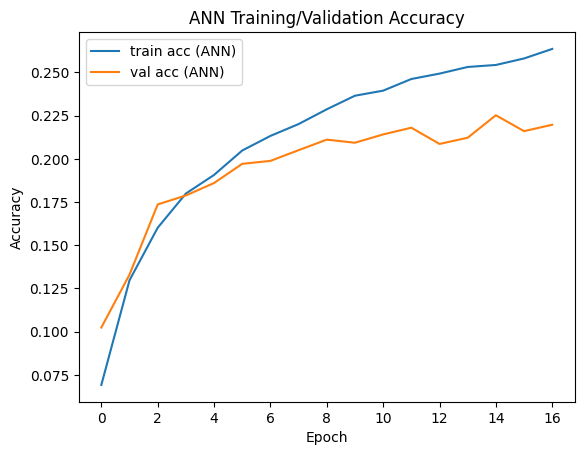

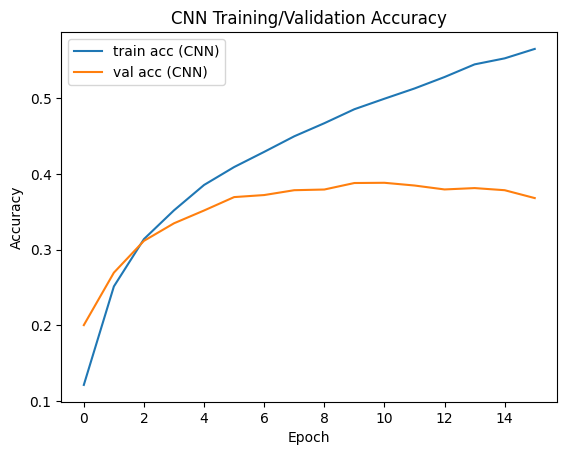

In [6]:
import matplotlib.pyplot as plt

# ANN Training history
plt.plot(ann_history_cifar.history['accuracy'], label='train acc (ANN)')
plt.plot(ann_history_cifar.history['val_accuracy'], label='val acc (ANN)')
plt.title('ANN Training/Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# CNN Training history
plt.plot(cnn_history_cifar.history['accuracy'], label='train acc (CNN)')
plt.plot(cnn_history_cifar.history['val_accuracy'], label='val acc (CNN)')
plt.title('CNN Training/Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


5. Prediction Analysis
Theory:

Use the best-performing model (likely the CNN) to make test predictions.

Visualize correct and incorrect classifications with images (for insight).

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


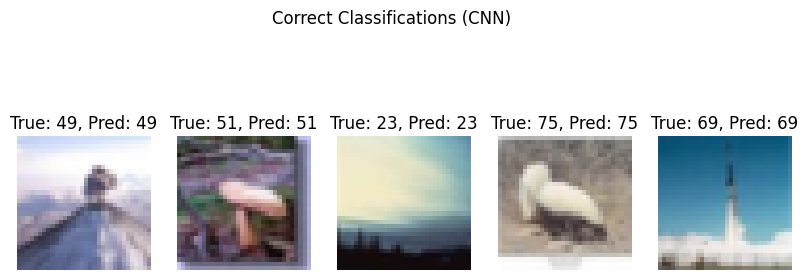

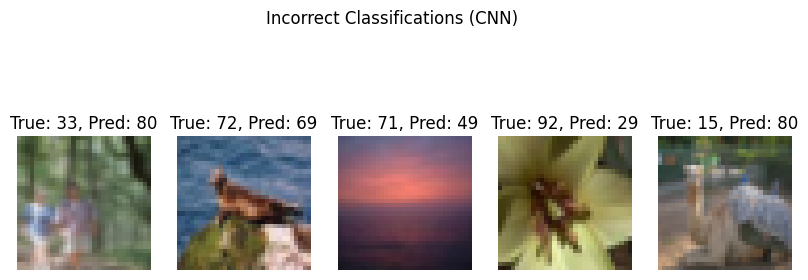

In [7]:
import numpy as np

# Predictions with CNN
predictions = cnn_model_cifar.predict(cifar100_test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(cifar100_test_labels_one_hot, axis=1)

correct_idx = np.where(predicted_classes == true_classes)[0]
incorrect_idx = np.where(predicted_classes != true_classes)[0]

# Plotting some correct and incorrect predictions
import matplotlib.pyplot as plt

# Correct
plt.figure(figsize=(10,4))
for i, idx in enumerate(correct_idx[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(cifar100_test_images[idx])
    plt.title(f"True: {true_classes[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')
plt.suptitle("Correct Classifications (CNN)")
plt.show()

# Incorrect
plt.figure(figsize=(10,4))
for i, idx in enumerate(incorrect_idx[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(cifar100_test_images[idx])
    plt.title(f"True: {true_classes[idx]}, Pred: {predicted_classes[idx]}")
    plt.axis('off')
plt.suptitle("Incorrect Classifications (CNN)")
plt.show()


##Conclusion


ANNs perform reasonably but are inferior in accuracy for image data.

CNNs efficiently capture image spatial structure and achieve higher accuracy, especially on complex datasets like CIFAR-100.

Results are visualized, showing that CNNs are preferable for image classification tasks.

Further improvements may include deeper architectures, data augmentation, or hyperparameter tuning.